# Capstone 3 - Exploratory Data Analysis (EDA) 

**Dataset**: transactions_clean.csv (processed in Step 2)

**Objective**: Explore the dataset to uncover user spending behavior, patterns, and insights that will inform clustering, LLM summaries, and personalized recommendations.

Start by importing libraries and loading the cleaned dataset from Step 2. This dataset has all missing values handled, features engineered, and LLM-ready descriptions.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned dataset
transactions = pd.read_csv('transactions_clean.csv')

# Quick overview
transactions.head()
transactions.info()
transactions.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         50000 non-null  int64  
 1   name                50000 non-null  object 
 2   surname             50000 non-null  object 
 3   gender              44953 non-null  object 
 4   birthdate           50000 non-null  object 
 5   transaction_amount  50000 non-null  float64
 6   date                50000 non-null  object 
 7   merchant_name       50000 non-null  object 
 8   category            50000 non-null  object 
 9   month               50000 non-null  int64  
 10  day_of_week         50000 non-null  object 
 11  is_expense          50000 non-null  int64  
 12  net_flow            50000 non-null  float64
 13  description         50000 non-null  object 
 14  description_source  50000 non-null  object 
dtypes: float64(2), int64(3), object(10)
memory usage: 5.7

,customer_id,transaction_amount,month,is_expense,net_flow
count,50000.00000,50000.000000,50000.000000,50000.0,50000.000000
mean,500136.79696,442.119239,5.252240,1.0,-442.119239
std,288232.43164,631.669724,2.729506,0.0,631.669724
min,29.00000,5.010000,1.000000,1.0,-2999.880000
25%,251191.50000,79.007500,3.000000,1.0,-470.515000
50%,499520.50000,182.195000,5.000000,1.0,-182.195000
75%,749854.25000,470.515000,8.000000,1.0,-79.007500
max,999997.00000,2999.880000,10.000000,1.0,-5.010000


The dataset is ready for exploration, with numeric columns for amounts, time-based features, and categorical columns for merchants and categories.

Let’s start by **understanding overall spending patterns**: total and average transaction amounts, and distribution of spending.

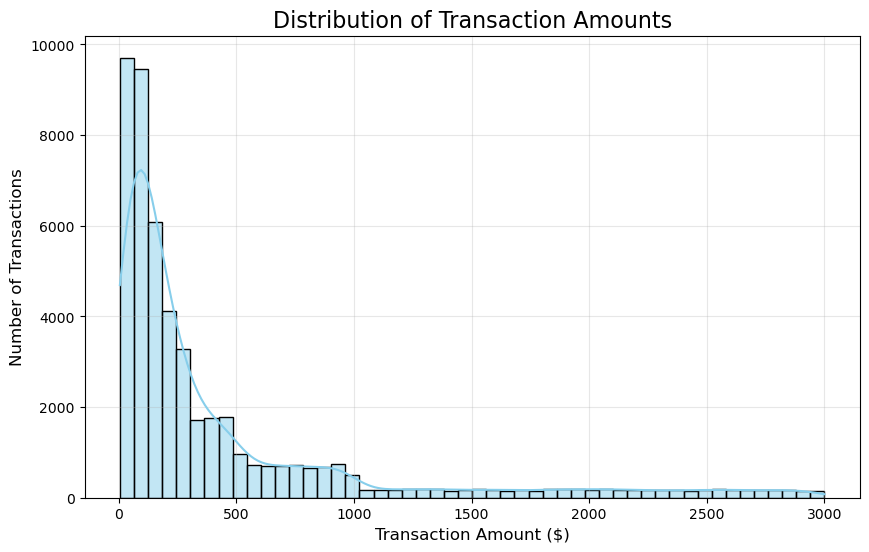

In [13]:
# Summary statistics for transaction amounts
transactions['transaction_amount'].describe()

# Histogram of transaction amounts
plt.figure(figsize=(10,6))
sns.histplot(transactions['transaction_amount'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Transaction Amounts', fontsize=16)
plt.xlabel('Transaction Amount ($)', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

Most transactions are **clustered at smaller amounts**, but some large transactions exist. This indicates a mix of daily spending and occasional high-value purchases.

Next, examine how spending is distributed across different categories, e.g., food, dining, tech, transport.

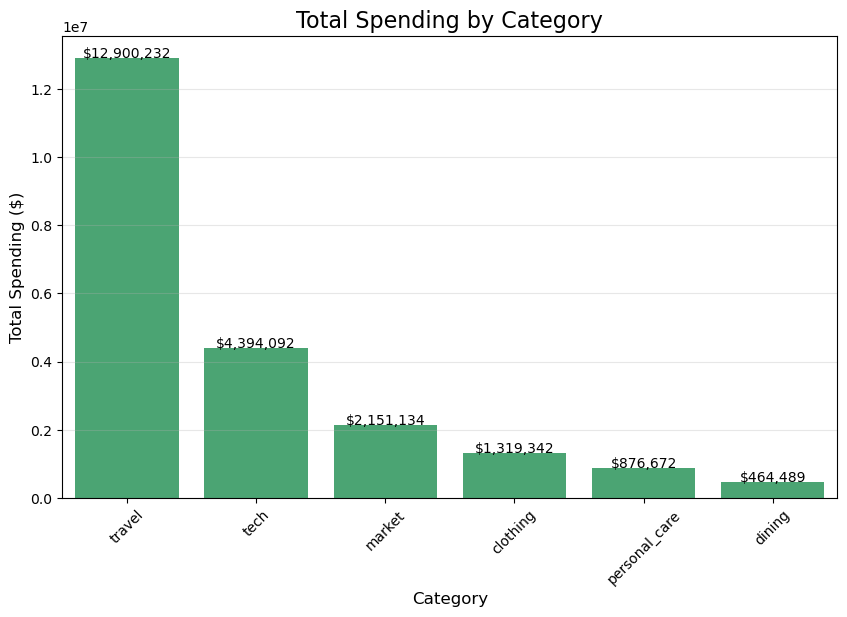

In [20]:
# Create DataFrame for category spending
category_df = transactions.groupby('category')['transaction_amount'].sum().sort_values(ascending=False).reset_index()
category_df.columns = ['category', 'total_spending']

plt.figure(figsize=(10,6))
# Use 'color' instead of 'palette' to avoid FutureWarning
sns.barplot(
    data=category_df,
    x='category',
    y='total_spending',
    color='mediumseagreen'  # single color for bars
)
plt.title('Total Spending by Category', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Total Spending ($)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

# Add labels
for i, val in enumerate(category_df['total_spending']):
    plt.text(i, val + 50, f"${val:,.0f}", ha='center', fontsize=10)

plt.show()


Travel and tech often dominate spending, followed by market and clothing. This insight helps the AI coach focus on categories where users spend the most.

**Analyze monthly and weekly spending patterns** to understand temporal behavior. This can guide insights for seasonal trends and personalized advice.

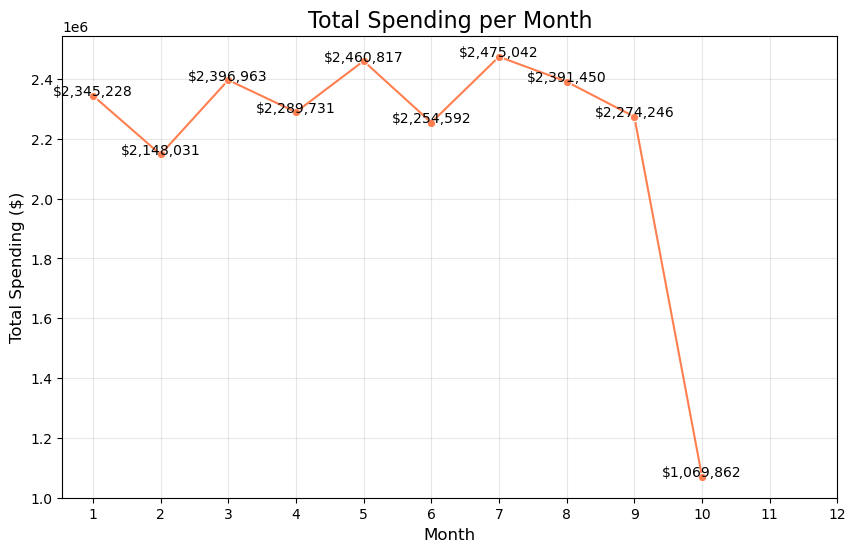

In [15]:
monthly_spending = transactions.groupby('month')['transaction_amount'].sum().reset_index()
monthly_spending.columns = ['month', 'total_spending']

plt.figure(figsize=(10,6))
sns.lineplot(data=monthly_spending, x='month', y='total_spending', marker='o', color='coral')
plt.title('Total Spending per Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Spending ($)', fontsize=12)
plt.xticks(range(1,13))
plt.grid(True, alpha=0.3)

# Add labels
for x, y in zip(monthly_spending['month'], monthly_spending['total_spending']):
    plt.text(x, y + 50, f"${y:,.0f}", ha='center', fontsize=10)

plt.show()


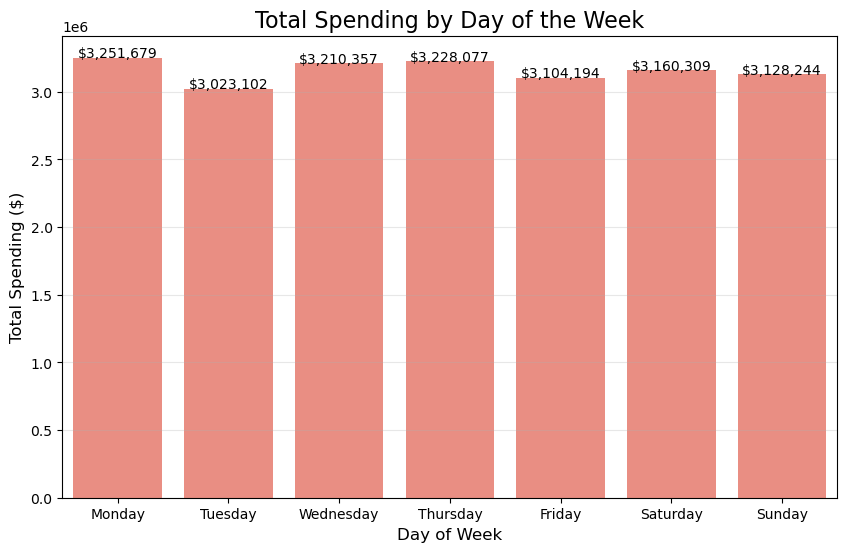

In [22]:
# Aggregate spending by day of week
weekday_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
weekday_spending = transactions.groupby('day_of_week')['transaction_amount'].sum().reindex(weekday_order).reset_index()
weekday_spending.columns = ['day_of_week', 'total_spending']

plt.figure(figsize=(10,6))
# Use a single color to avoid Seaborn palette warning
sns.barplot(
    data=weekday_spending,
    x='day_of_week',
    y='total_spending',
    color='salmon'
)
plt.title('Total Spending by Day of the Week', fontsize=16)
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Total Spending ($)', fontsize=12)
plt.grid(axis='y', alpha=0.3)

# Add formatted labels on top of bars
for i, val in enumerate(weekday_spending['total_spending']):
    plt.text(i, val + 50, f"${val:,.0f}", ha='center', fontsize=10)

plt.show()


Users spend differently depending on the month and day of the week. For example, weekends may see more discretionary spending. These trends are valuable for timing recommendations and coaching messages.

**Identify which merchants get the most spending**. This can help in personalized recommendations and category-level insights.

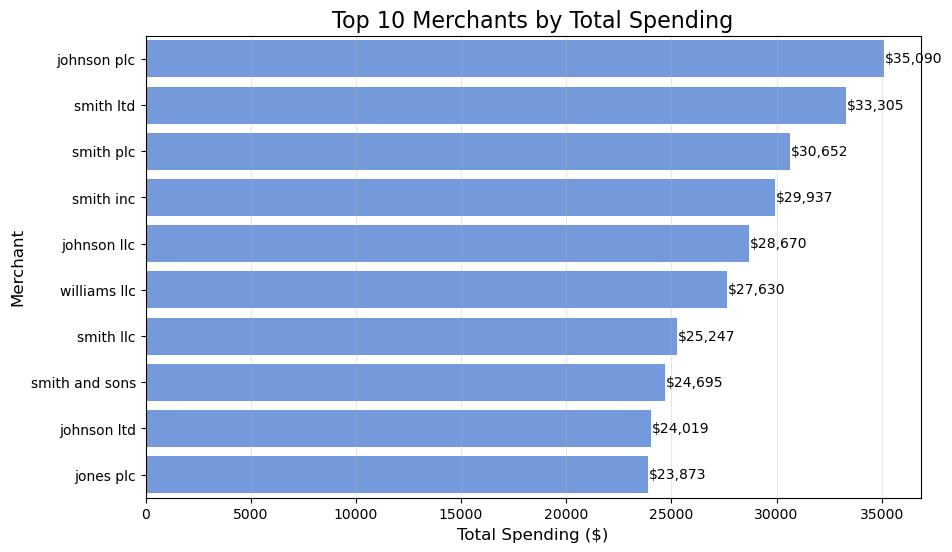

In [21]:
top_merchants = transactions.groupby('merchant_name')['transaction_amount'].sum().sort_values(ascending=False).head(10).reset_index()
top_merchants.columns = ['merchant_name', 'total_spending']

plt.figure(figsize=(10,6))
sns.barplot(
    data=top_merchants,
    x='total_spending',
    y='merchant_name',
    color='cornflowerblue'
)
plt.title('Top 10 Merchants by Total Spending', fontsize=16)
plt.xlabel('Total Spending ($)', fontsize=12)
plt.ylabel('Merchant', fontsize=12)
plt.grid(axis='x', alpha=0.3)

# Add labels
for i, val in enumerate(top_merchants['total_spending']):
    plt.text(val + 50, i, f"${val:,.0f}", va='center', fontsize=10)

plt.show()


This shows where users spend the most money. The AI coach can use this info to provide merchant-specific insights or warnings about overspending.

**Explore spending behavior per user.** For instance, total spend, average transaction amount, and transaction frequency.

In [7]:
# Aggregate per user
user_spending = transactions.groupby('customer_id')['transaction_amount'].agg(['sum','mean','count']).reset_index()

# Quick look at top spenders
user_spending.sort_values('sum', ascending=False).head(10)

,customer_id,sum,mean,count
14038,281313,2999.88,2999.88,1
2697,55197,2999.68,2999.68,1
5956,119569,2999.22,2999.22,1
2745,56330,2998.51,2998.51,1
392,8255,2998.48,2998.48,1
2457,50769,2997.81,2997.81,1
5077,102093,2997.11,2997.11,1
8727,174847,2996.86,2996.86,1
33072,660015,2996.85,2996.85,1
49040,979973,2996.45,2996.45,1


This allows us to identify high-spending users and analyze their patterns for personalized coaching or segmentation.

**Visualize how spending varies across users** to detect behavioral patterns and potential clusters.

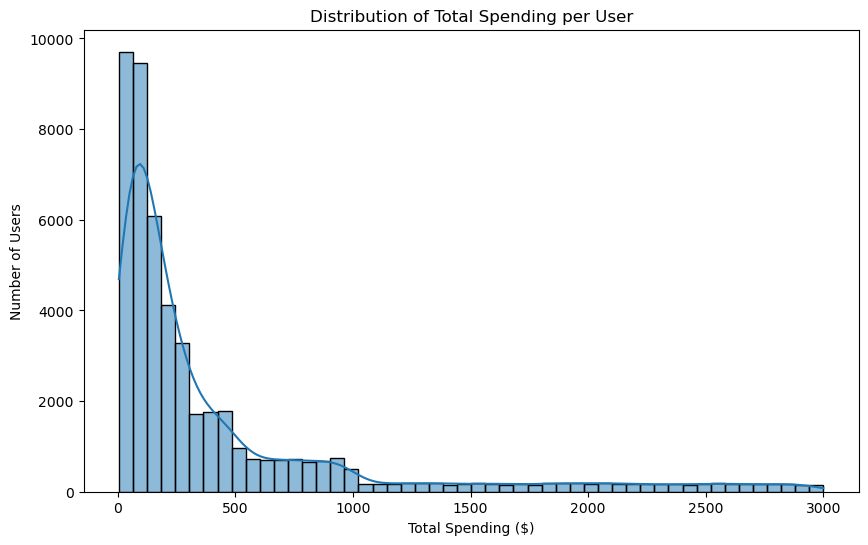

In [19]:
plt.figure(figsize=(10,6))
sns.histplot(user_spending['sum'], bins=50, kde=True)
plt.title('Distribution of Total Spending per User')
plt.xlabel('Total Spending ($)')
plt.ylabel('Number of Users')
plt.show()

Most users spend moderate amounts, but a few spend significantly more. This justifies clustering users into personas later for AI coaching.

**Analyze category spending per user using a heatmap** to see which categories dominate for different users.

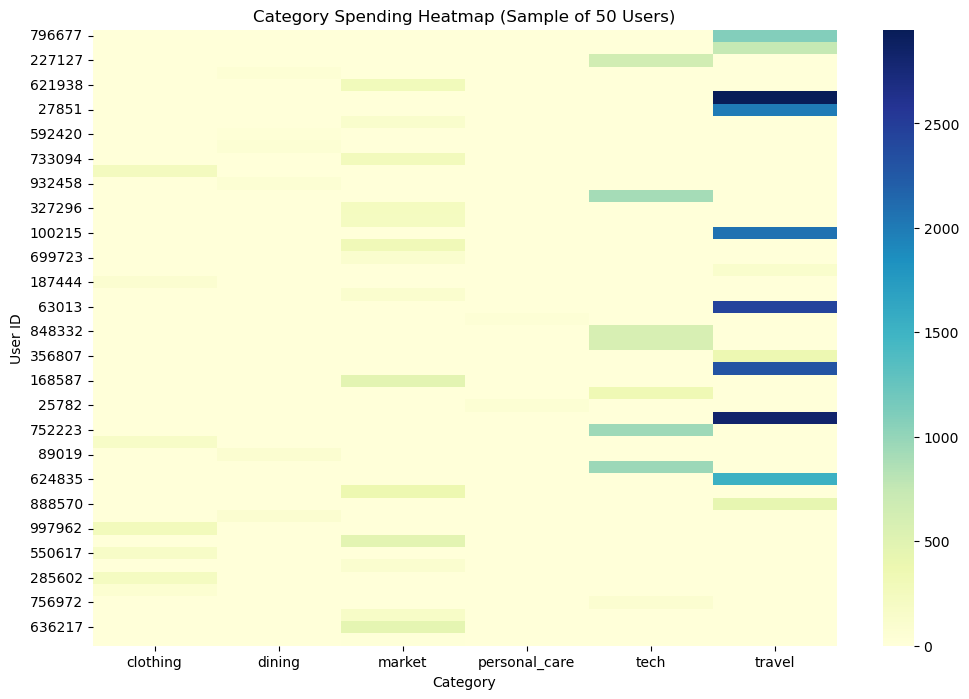

In [9]:
user_category = transactions.pivot_table(index='customer_id', columns='category', values='transaction_amount', aggfunc='sum', fill_value=0)

plt.figure(figsize=(12,8))
sns.heatmap(user_category.sample(50), cmap='YlGnBu')
plt.title('Category Spending Heatmap (Sample of 50 Users)')
plt.xlabel('Category')
plt.ylabel('User ID')
plt.show()

This heatmap shows how spending varies by category for different users. Useful for LLM insights and targeted advice.
**The travel category dominated for different users**.

## EDA Summary 

- Explored overall spending patterns, top categories, and merchants
- Identified temporal trends: monthly and weekly patterns
- Analyzed user-level behavior: total spending, frequency, category preferences
- Produced visualizations that highlight insights for stakeholders

Findings will inform:

- Clustering users into personas
- LLM-based coaching messages
- Personalized recommendations by category and merchant